# The Perceptron Algorithm

We are going to implement the Perceptron Algorithm on our dataset.

In [1]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.
import numpy as np
import pandas as pd

df = pd.read_csv('news/news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()

,news,label
0,smell hillary fear daniel greenfield shillman ...,0
1,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy us secretary s...,1
3,bernie supporter twitter erupt anger dnc tried...,0
4,battle new york primary matter primary day new...,1


In [2]:
# Vectorization
df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)
tf_idf_matrix

<6335x80967 sparse matrix of type '<class 'numpy.float64'>'
	with 1762247 stored elements in Compressed Sparse Row format>

In [3]:
label_column = df.loc[:,'label']
labels = label_column.values
print(labels)

[0 0 1 ... 0 1 1]


In [4]:
#Downloading the Perceptron algorithm from scikit learn
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

To implement the Perceptron algorithm we need to split our dataset into training and test data.

In [5]:
x = tf_idf_matrix
y = df_output.values
model = Perceptron()

#We will use 'train_test_split' funcition to split our dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Now we can fit the model to our training data.

In [6]:
model.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [7]:
#Making predictions
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

# Measuring model performance

Now we will measure the Perceptron model's performance with it fit to our training data.

In [8]:
#Implementing our model with the test data
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.923198316675434

In [9]:
#Measuring the performance of our model
print("accuracy: %0.3f" % (accuracy_score(y_test, y_pred)))

accuracy: 0.923


Hence the accuracy is 92.3% which is good.

Now to test the accuracy of the model using a different training and test data size.
We will split the training and test data with a 75:25 ratio.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_predict = model.predict(x_test)
model.score(x_test, y_test)
%time model.fit(x_train, y_train)

Wall time: 31.2 ms


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
print("accuracy: %0.3f" % (accuracy_score(y_test, y_predict)))

accuracy: 0.930


Hence the model has a better accuracy of 93% using a 75:25 ratio of train to test data.

In [13]:
test_sizes = np.arange(0.01,0.5,0.01)
accuracys = []
for i in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=42)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    accuracys.append(accuracy)
    
accuracys

[0.921875,
 0.937007874015748,
 0.9476439790575916,
 0.9212598425196851,
 0.917981072555205,
 0.9422572178477691,
 0.9301801801801802,
 0.9171597633136095,
 0.9316987740805605,
 0.919558359621451,
 0.926829268292683,
 0.9224704336399474,
 0.9356796116504854,
 0.9425028184892897,
 0.92534174553102,
 0.928007889546351,
 0.9285051067780873,
 0.9237510955302366,
 0.9352159468438538,
 0.9281767955801105,
 0.9226145755071374,
 0.9296987087517934,
 0.9224965706447188,
 0.9171597633136095,
 0.9299242424242424,
 0.9180825242718447,
 0.9228521332554062,
 0.9272829763246899,
 0.9221980413492927,
 0.923198316675434,
 0.9307535641547862,
 0.9235700197238659,
 0.9258727881396461,
 0.9275766016713092,
 0.9251577998196574,
 0.9254712845243315,
 0.9168088737201365,
 0.9156976744186046,
 0.9194658033184946,
 0.9194948697711128,
 0.9122401847575058,
 0.9086809470124013,
 0.913394495412844,
 0.9088952654232425,
 0.9168712732374605,
 0.9097770154373928,
 0.9086635325721961,
 0.9177902005919105,
 0.90660225

Text(0, 0.5, 'Perceptron Algorithm Accuracy')

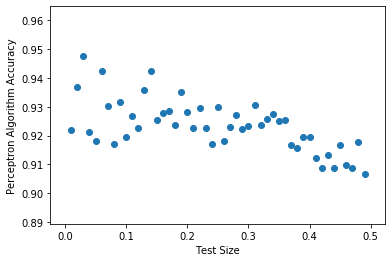

In [14]:
import matplotlib.pyplot as plt
plt.scatter(test_sizes, accuracys)
plt.xlabel('Test Size')
plt.ylabel('Perceptron Algorithm Accuracy')

In [15]:
test_sizes[np.argmax(accuracys)]

0.03

Hence our Perceptron Algorithm model has greatest accuracy with a very small test size.

# Confusion Matrix

To visualise the performance of our model, we can use a confusion matrix. This compares the actual class with the predicted class.

In [16]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, model.predict(x_test))
classification = metrics.classification_report(y_test,model.predict(x_test))

In [17]:
print('Success rate of the model on fake news articles: ' + str(confusion[0][0]/(confusion[0][0] + confusion[0][1])))
print('Success rate of the model on real news articles: ' + str(confusion[1][1]/(confusion[1][0] + confusion[1][1])))

Success rate of the model on fake news articles: 0.9051889814221653
Success rate of the model on real news articles: 0.9080310880829016


Hence this model is quite accurate when classifying news articles, and slightly more accurate at predicting real news articles.

We can calculate the relevant metrics other than accuracy, which are precision, recall and the harmonic average of precision and recall which is the f1-score. This gives us a better evaluation of the performance of our Perceptron model.

In [18]:
print(confusion)
print(classification)

[[1413  148]
 [ 142 1402]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1561
           1       0.90      0.91      0.91      1544

    accuracy                           0.91      3105
   macro avg       0.91      0.91      0.91      3105
weighted avg       0.91      0.91      0.91      3105



So we have high precision and recall with an F1 score of 0.91 for both real and fake articles.

# Testing on unseen data

Now that we have built a Perceptron algorithm model, we want to see how this model performs on unseen data. We will now preprocess two articles, one real and one fake, into vector form so we can test our model on them.

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()
    

def article_preprocessor (article):
    filtered_article = ''
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    return filtered_article

In [20]:
def perceptron_classifier (list_of_articles):
    
    #To preprocess these articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    new_input = df_input.append(pd.Series(articles_pp))
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    
    #Performing the Perceptron algorithm on the dataset
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    model = Perceptron()
    model.fit(x_train, y_train)
    accuracy = model.score(x_test,y_test)
    print('The Perceptron algorithm model accuracy: ' +str(accuracy))
    
    prediction = model.predict(new_data_matrix)
    
    return prediction
    

In [21]:
# The top news story on the BBC
bbc_news_article = '''The furlough scheme will be extended until the end of September by the chancellor in the Budget later.
Rishi Sunak said the scheme - which pays 80% of employees' wages for the hours they cannot work in the pandemic - would help millions through "the challenging months ahead".
Some 600,000 more self-employed people will also be eligible for government help as access to grants is widened.
But Labour said the support schemes should have been extended "months ago".
Mr Sunak will outline a three-point plan to support people through the coming months, rebuild the economy and "fix" the public finances in the wake of the pandemic when he delivers his statement to the Commons at about 12:30 GMT.
But he has warned of tough economic times ahead and there are reports that he plans to raise some taxes.'''

# Here's a fake news article from the New York Mag
fake_article = '''Twelve days out from judgment day in an election in which he continues to trail badly, President Trump continues to hammer home an issue that will surely resonate with that small slice of still-undecided voters: his supposedly unfair treatment at the hands of CBS’s Lesley Stahl. After two days of promising to release unedited footage of an as-yet-unaired 60 Minutes interview, during which he walked out prematurely because he was upset with Stahl’s line of questioning, the president finally followed through on Thursday. Throughout the interview, Stahl presses Trump on issues from health care (the president says he hopes the Supreme Court strikes down Obamacare, a politically toxic position) to his derogatory comments about Anthony Fauci (Trump claims he was misinterpreted) to his false claims that the Obama campaign spied on him. The tone is of an adversarial back-and-forth, well within normal journalistic bounds. Nevertheless, Trump continuously claims that Joe Biden hasn’t been given similar treatment by CBS and cuts the proceedings short.'''

In [22]:
articles = [bbc_news_article,fake_article]
perceptron_classifier(articles)

The Perceptron algorithm model accuracy: 0.9292929292929293


array([1, 0], dtype=int64)

Hence our Perceptron algorithm has correctly classified both the real and fake news article!

# Hyperparameter Optimisation

Now we will try and improve our model's peformance using grid search.

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [24]:
x = tf_idf_matrix
y = df_output.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

To vary the learning rate and see how this affects our model's performance.

In [25]:
model = Perceptron()
#alpha is the learning rate of our Perceptron ALgorithm model
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0],}

In [26]:
model.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [27]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

In [28]:
grid.fit(x_train, y_train)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002811CAC6AC8>,
             error_score='raise-deprecating',
             estimator=Perceptron(alpha=0.0001, class_weight=None,
                                  early_stopping=False, eta0=1.0,
                                  fit_intercept=True, max_iter=1000,
                                  n_iter_no_change=5, n_jobs=None, penalty=None,
                                  random_state=0, shuffle=True, tol=0.001,
                                  validation_fraction=0.1, verbose=0,
                                  warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [29]:
results = grid.fit(x_train, y_train)
print('Mean Accuracy: %.3f' % results.best_score_)

Mean Accuracy: 0.925


In [30]:
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.0001}


In [31]:
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']

In [32]:
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.925 with: {'alpha': 0.0001}
>0.925 with: {'alpha': 0.001}
>0.925 with: {'alpha': 0.01}
>0.925 with: {'alpha': 0.1}
>0.925 with: {'alpha': 1.0}


Hence we can see that with all of these learning rates, our Perceptron Algorithm model has a good perfomance with an accuracy of larger than 92.5%.

Now we will test whether changing the constant in which the updates are multiplied will improve the performance of our model.

In [33]:
param_grid = {"eta0": [0.0001, 0.001, 0.01, 0.1, 1.0],}
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

In [34]:
results = grid.fit(x_train, y_train)
print('Mean Accuracy: %.3f' % results.best_score_)

Mean Accuracy: 0.925


In [35]:
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.925 with: {'eta0': 0.0001}
>0.925 with: {'eta0': 0.001}
>0.925 with: {'eta0': 0.01}
>0.925 with: {'eta0': 0.1}
>0.925 with: {'eta0': 1.0}


Again, we can see that with these different constants, the model still has an accuracy of larger than 92.5%.

We can also vary the proportion of data set aside for validation set for early stopping.

In [36]:
param_grid = {"validation_fraction": [0.001, 0.002, 0.01, 0.02, 0.1, 0.2],}
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
results = grid.fit(x_train, y_train)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.925 with: {'validation_fraction': 0.001}
>0.925 with: {'validation_fraction': 0.002}
>0.925 with: {'validation_fraction': 0.01}
>0.925 with: {'validation_fraction': 0.02}
>0.925 with: {'validation_fraction': 0.1}
>0.925 with: {'validation_fraction': 0.2}


Again, the validation fractions listed do not affect the accuracy of our Perceptron model.

We can also alter the random state of our model.

In [37]:
param_grid = {"random_state": [0, 1, 5, 25, 42, 50],}
grid = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')
results = grid.fit(x_train, y_train)
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

>0.925 with: {'random_state': 0}
>0.925 with: {'random_state': 1}
>0.922 with: {'random_state': 5}
>0.923 with: {'random_state': 25}
>0.924 with: {'random_state': 42}
>0.923 with: {'random_state': 50}


Hence our model has greatest accuracy with a low random state.